# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


177 age values are missing as seen from the data

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())  #filing of missing values of age by median


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we will make graphs and visualize data

In [8]:
df['died']=1-df['Survived']

,Survived
Sex,
female,0.742038
male,0.188908


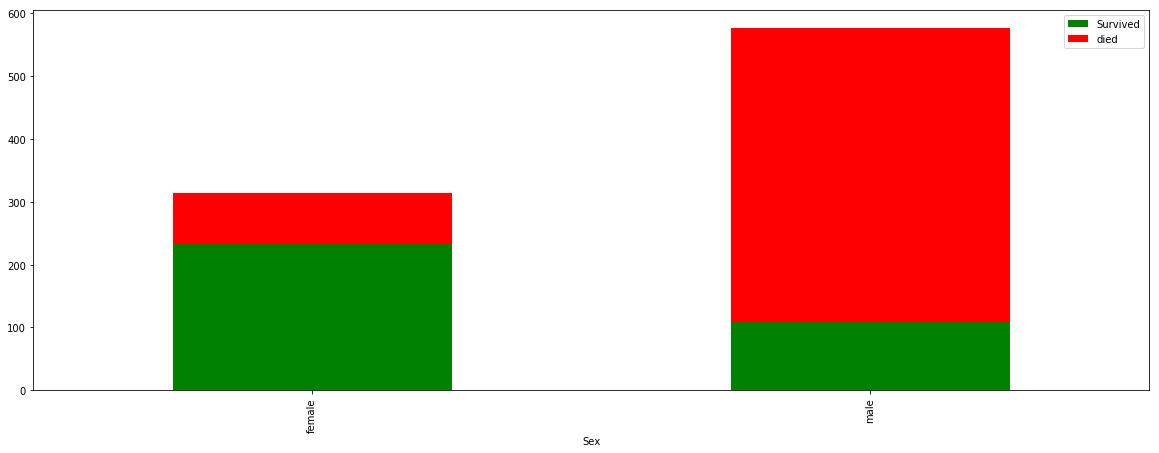

In [9]:
df.groupby('Sex').agg('sum')[['Survived', 'died']].plot(kind='bar', figsize=(20, 7),
                                                         stacked=True,  color=['g', 'r']);
df[["Sex","Survived"]].groupby('Sex').mean()

## 1. Females survived more than males

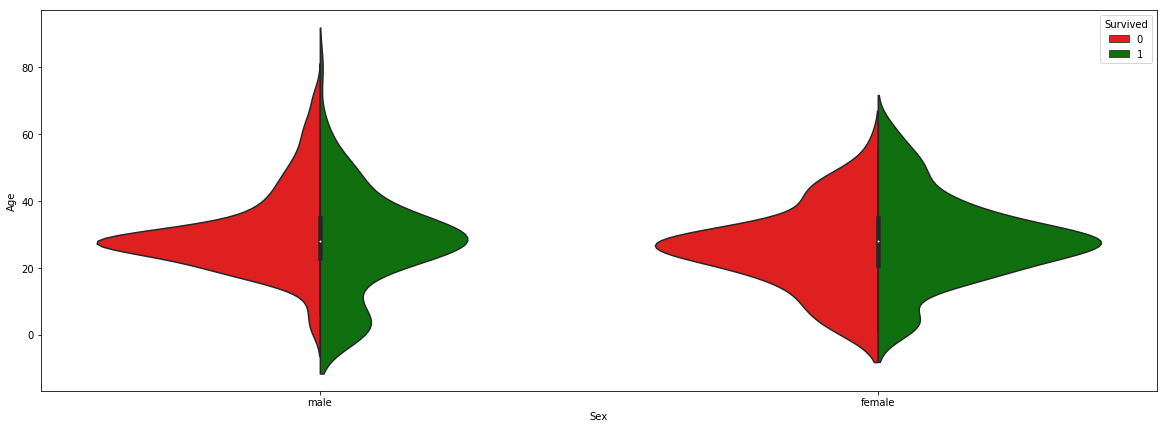

In [10]:
fig = plt.figure(figsize=(20, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=df, 
               split=True,
               palette={0: "r", 1: "g"}
              );

## 2. The age conditions the survival for male passengers:
 #### (1)Younger male tend to survive
 #### (2)A large number of passengers between 20 and 40 succumb

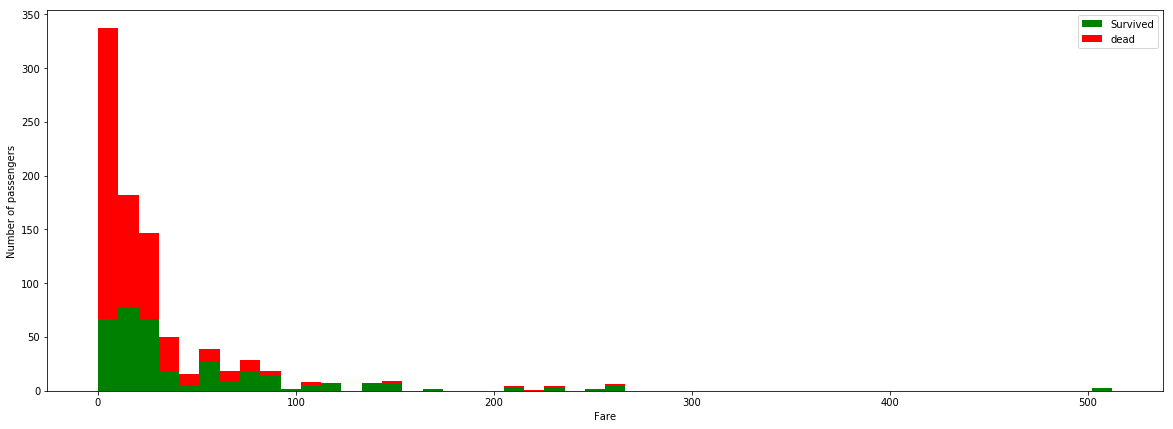

In [11]:
figure = plt.figure(figsize=(20, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

## 3. Passengers with cheaper tickets more likely to die

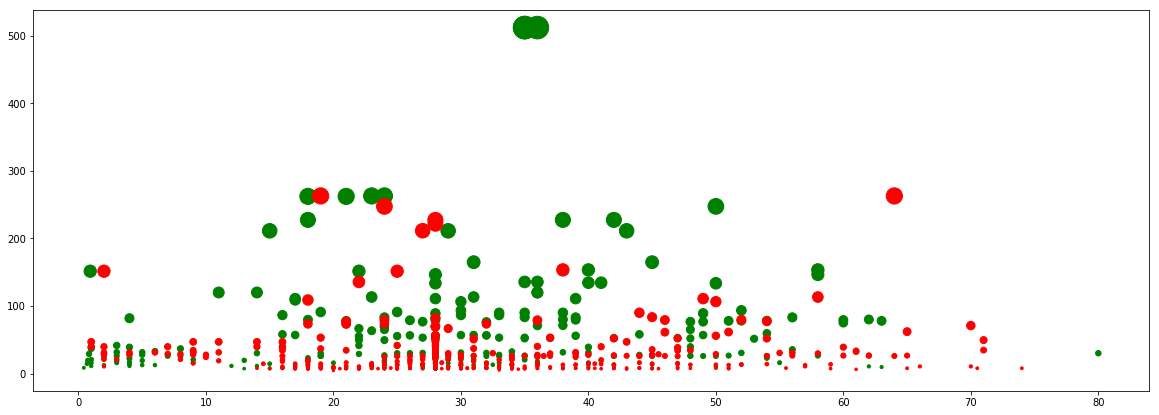

In [12]:
plt.figure(figsize=(20, 7))
ax = plt.subplot()

ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], 
           c='green', s=df[df['Survived'] == 1]['Fare'])
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], 
           c='red', s=df[df['Survived'] == 0]['Fare']);

## 4. The size of the circles is proportional to the ticket fare.
On the x-axis, we have the ages and the y-axis, we consider the ticket fare.
We can observe different clusters:
##### Large green dots between x=20 and x=45: adults with the largest ticket fares
##### Small red dots between x=10 and x=45, adults from lower classes on the boat
##### Small greed dots between x=0 and x=7: these are the children that were saved

In [13]:
df['Name'].head()                  # This shows name contains title

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [14]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df['Name']]
df['Title'] = pd.Series(dataset_title)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

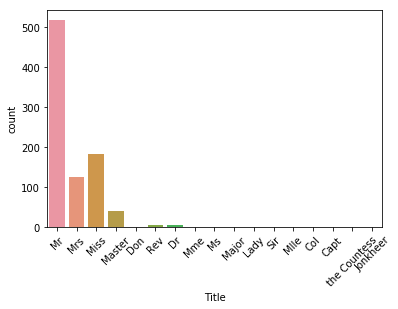

In [15]:
g = sns.countplot(x='Title',data=df)
g = plt.setp(g.get_xticklabels(), rotation=45) 

There are 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [16]:
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df["Title"] = df["Title"].astype(int)

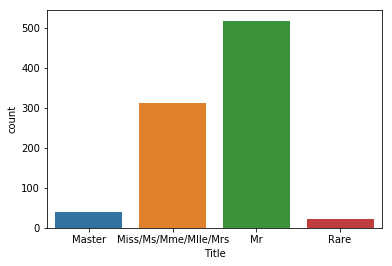

In [17]:
g = sns.countplot(df["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

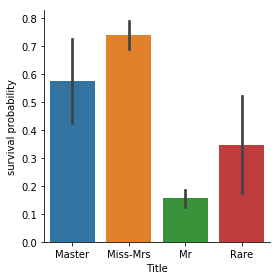

In [18]:
g = sns.factorplot(x="Title",y="Survived",data=df,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

## 5. This clearly shows that people with rare title have more chances to survive over man.
## 6. This shows proves that they follwed "Women first"

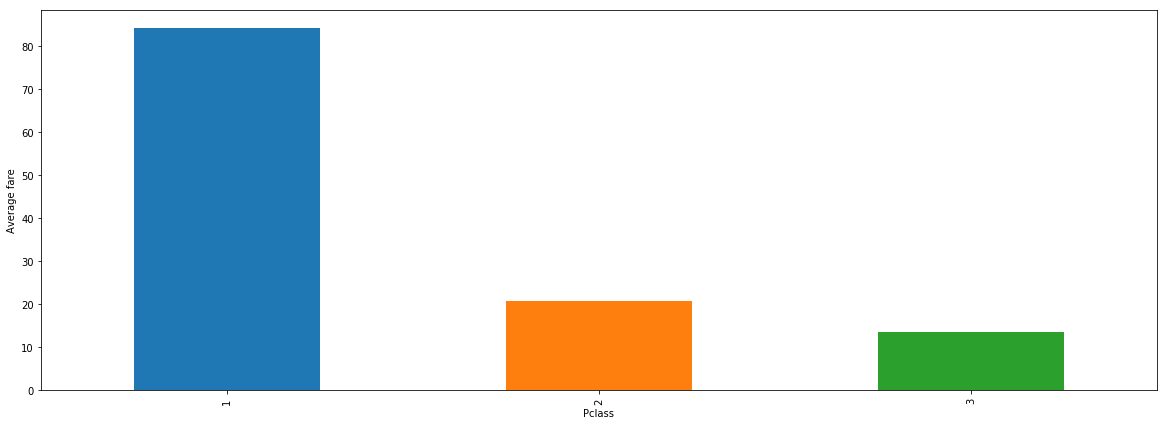

In [19]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
df.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(20, 7), ax = ax);
# This shows that fare increases with the class

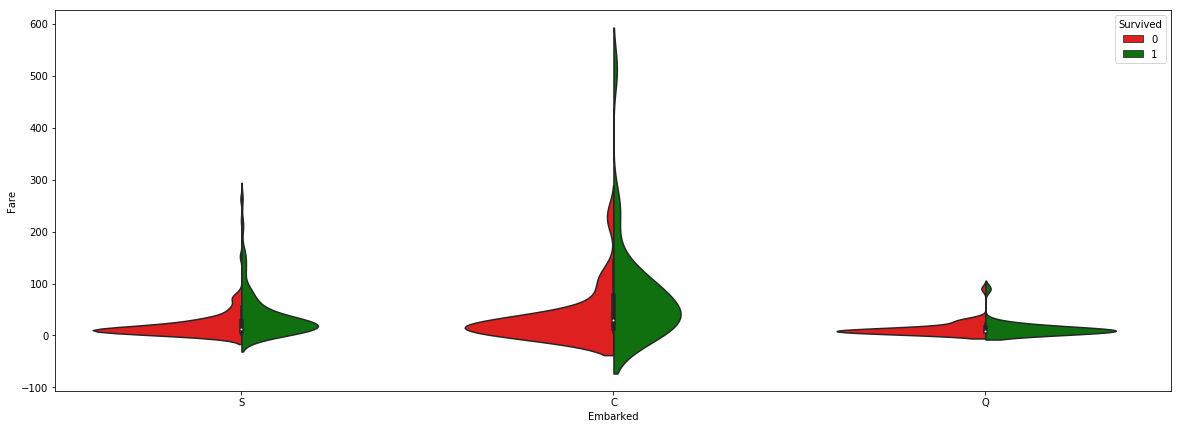

In [20]:
fig = plt.figure(figsize=(20, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df, split=True, palette={0: "r", 1: "g"});

## 7. Variation of embarkation with fare and result of survival rate
It seems that the embarkation C have a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive.
We also see this happening in embarkation S and less in embarkation Q.

In [21]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [22]:
df['Cabin'].isnull().sum()

687

In [23]:
df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

Assumption: All the null values are filled by 'X' indicating that those people were not present in any cabin

In [24]:
df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'] ])

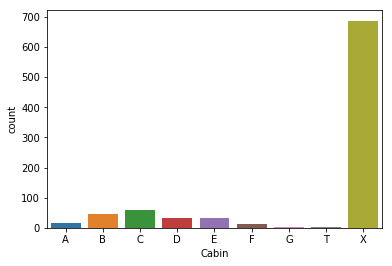

In [25]:
g = sns.countplot(df["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

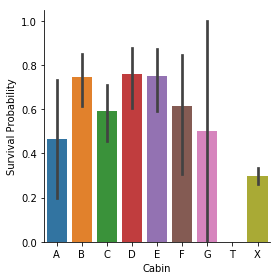

In [26]:
g = sns.factorplot(y="Survived",x="Cabin",data=df,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

## 8. This shows that the people who were not in any cabin have the least chance of survival

In [27]:
df['SibSp'].max()

8

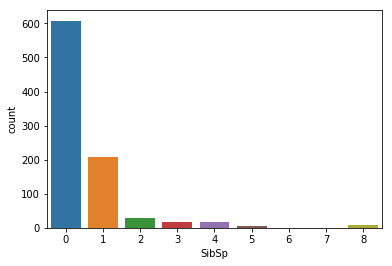

In [28]:
g = sns.countplot(df['SibSp'],order=[0,1,2,3,4,5,6,7,8])

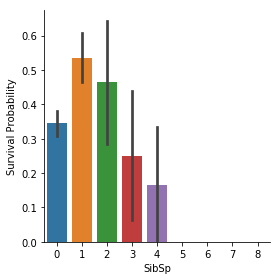

In [29]:
g = sns.factorplot(y="Survived",x="SibSp",data=df,kind="bar",order=[0,1,2,3,4,5,6,7,8])
g = g.set_ylabels("Survival Probability")

## 9. The above graph follows that families having large size has less chance of survival
-  No familes survived which have more than equal to 5 siblings

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
targets =df['Survived']

In [32]:
df=df.drop(['PassengerId', 'Name', 'Sex', 
       'Ticket', 'Cabin', 'Embarked','Survived','died'],axis=1)

In [33]:
df

,Pclass,Age,SibSp,Parch,Fare,Title
0,3,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,2
5,3,28.0,0,0,8.4583,2
6,1,54.0,0,0,51.8625,2
7,3,2.0,3,1,21.0750,0
8,3,27.0,0,2,11.1333,1
9,2,14.0,1,0,30.0708,1


In [34]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(df, targets)

In [35]:
features = pd.DataFrame()
features['feature'] = df.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

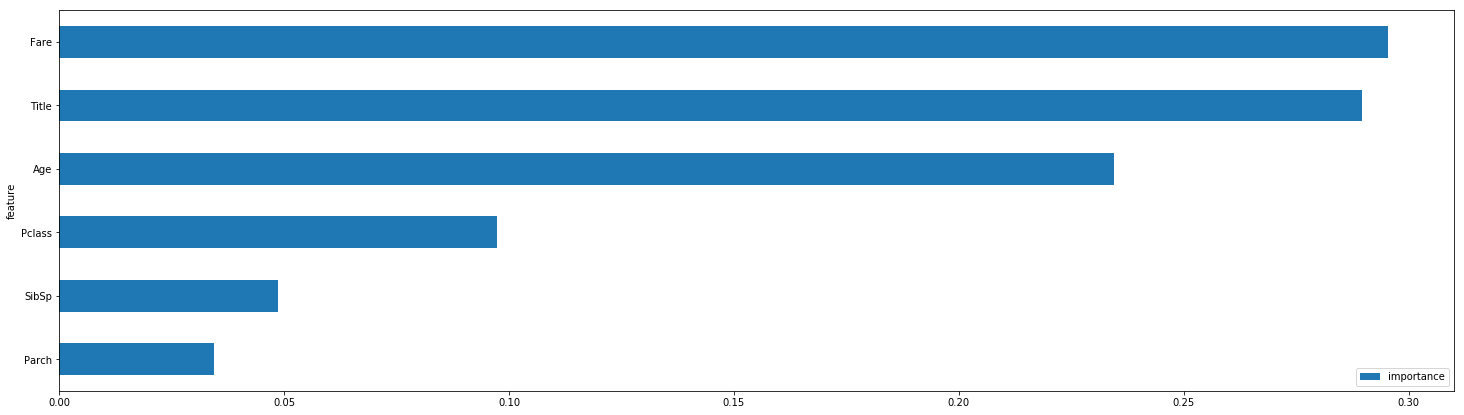

In [36]:
features.plot(kind='barh', figsize=(25, 7))

## 10. This shows that title is of atmost importance and parch is of least importance among the remaining features left after removing the correlated features.